In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#'월평균 이용금액' 데이터 불러오기

전처리 후 덮어쓰기 한 '월평균 이용금액' 데이터를 불러옴.

In [ ]:
import pandas as pd

# 예시: MyDrive/ott분석/amount_df.csv 라면
file_path = '/content/drive/MyDrive/SeD1st/1st Dataton/JDG/J.유료서비스_월평균_이용금액_21-23.csv'

amount_df = pd.read_csv(file_path)

# 데이터 일부 확인
print(amount_df.head())


   구분별(2)       2023        2023.1                2023.2  \
0  구분별(2)  사례수 (가구원)  5000원 미만 (%)  5000원-10000원  미만 (%)   
1      소계      29222           3.9                   3.8   
2      남자      14554           3.7                   4.1   
3      여자      14668           4.1                   3.6   
4  13~19세       1980           6.1                   4.1   

                  2023.3                 2023.4         2023.5         2023.6  \
0  10000원-15000원  미만 (%)  15000원-20000원  미만 (%)  20000원 이상 (%)  유료서비스 비이용 (%)   
1                    9.5                    3.7            4.0           75.0   
2                   10.7                    3.8            4.3           73.5   
3                    8.4                    3.7            3.8           76.5   
4                    6.4                    2.2            1.7           79.5   

          2023.7       2022  ...         2022.6         2022.7       2021  \
0  월 평균 이용금액 (원)  사례수 (가구원)  ...  유료서비스 비이용 (%)  월 평균 이용금액 (원)  사례수 (가구원)  

#현재 금액대비 최대 지불 의향 데이터 불러오기

전처리 후 덮어쓰기 한 '현재 금액대비 최대 지불 의향' 데이터를 불러옴.

In [1]:
import pandas as pd

# 예시: MyDrive/ott분석/amount_df.csv 라면
file_path = '/content/drive/MyDrive/SeD1st/1st Dataton/JDG/J.이용료의_현재_금액_대비_최대_지불_의향_21-23.csv'

extend_df = pd.read_csv(file_path)

# 데이터 일부 확인
print(extend_df.head(2))

   구분별(2)       2021         2021.1          2021.2          2021.3  \
0  구분별(2)  사례수 (가구원)  1%~10% 미만 (%)  10%~20% 미만 (%)  20%~30% 미만 (%)   
1      소계      35626            6.7             4.4             2.0   

           2021.4          2021.5      2021.6                     2021.7  \
0  30%~40% 미만 (%)  40%~50% 미만 (%)  50% 이상 (%)  이용료가 인상된다면 이용할 의향이 없다 (%)   
1             0.5             0.3         0.2                        5.1   

    2021.8  ...   2022.8       2023         2023.1          2023.2  \
0  비이용 (%)  ...  비이용 (%)  사례수 (가구원)  1%~10% 미만 (%)  10%~20% 미만 (%)   
1     80.7  ...     71.9      29222            9.5             6.6   

           2023.3          2023.4          2023.5      2023.6  \
0  20%~30% 미만 (%)  30%~40% 미만 (%)  40%~50% 미만 (%)  50% 이상 (%)   
1             2.3             1.1             0.3         0.1   

                      2023.7   2023.8  
0  이용료가 인상된다면 이용할 의향이 없다 (%)  비이용 (%)  
1                        5.1     75.0  

[2 rows x 28 columns]


#'현재 금액대비 최대 지불 의향' 데이터 시각화

각 연도별로 현재 금액 대비 추가 지불 의향 수준을 시각화 함.

범주는 '현재 요금의 몇 %까지 추가로 지불할 수 있는가'로 구분됨.

이를 통해 가격 인상 여력에 대한 소비자 태도를 파악 가능.

분석결과 : 현재 금액대비 추가 지불 의향이 없다는 의견이 지배적이라고 분석함.

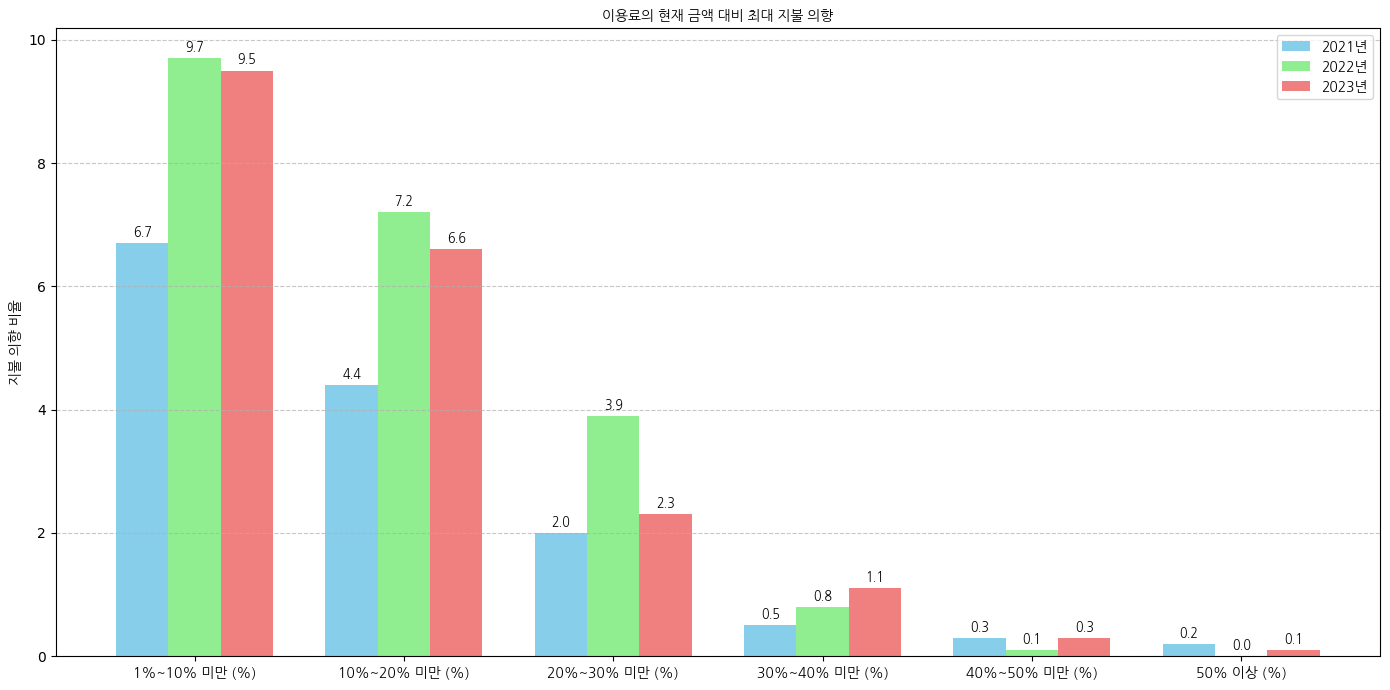

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

# 1. 나눔고딕 폰트 경로 설정 (구글 드라이브 마운트가 되어있다고 가정)
font_path = '/content/drive/MyDrive/Colab Notebooks/NanumGothic.ttf'  # 자신의 경로에 맞게 수정하세요
fontprop = fm.FontProperties(fname=font_path)

# 2. Matplotlib 기본 폰트 설정
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 기존 코드 실행
categories = ['1%~10% 미만 (%)', '10%~20% 미만 (%)', '20%~30% 미만 (%)', '30%~40% 미만 (%)', '40%~50% 미만 (%)', '50% 이상 (%)']
years = ['2021', '2022', '2023']

sogye_row = extend_df[extend_df['구분별(2)'] == '소계'].iloc[0]

data_2021 = pd.to_numeric([sogye_row[f'2021.{i}'] for i in range(1, 7)], errors='coerce').tolist()
data_2022 = pd.to_numeric([sogye_row[f'2022.{i}'] for i in range(1, 7)], errors='coerce').tolist()
data_2023 = pd.to_numeric([sogye_row[f'2023.{i}'] for i in range(1, 7)], errors='coerce').tolist()

x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - width, data_2021, width, label='2021년', color='skyblue')
rects2 = ax.bar(x, data_2022, width, label='2022년', color='lightgreen')
rects3 = ax.bar(x + width, data_2023, width, label='2023년', color='lightcoral')  # label 수정

ax.set_ylabel('지불 의향 비율', fontproperties=fontprop)
ax.set_title('이용료의 현재 금액 대비 최대 지불 의향', fontproperties=fontprop)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontproperties=fontprop)
ax.legend(prop=fontprop)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if not np.isnan(height):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9, fontproperties=fontprop)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#'월평균 이용금액' 데이터를 연도별로 막대그래프 시각화

2021년부터 2023년까지 사용자의 월 이용금액 분포를 비교함.

각 연도별로 '5천원 미만', '5천~1만원', ..., '2만원 이상'의 구간별 비율을 시각화하여 소비자 지출 패턴의 변화를 분석함.

분석결과 : 21년 22년 23년 모두 1만원 ~ 1만 5천원의 가격대가 가장 선호된다고 분석함.

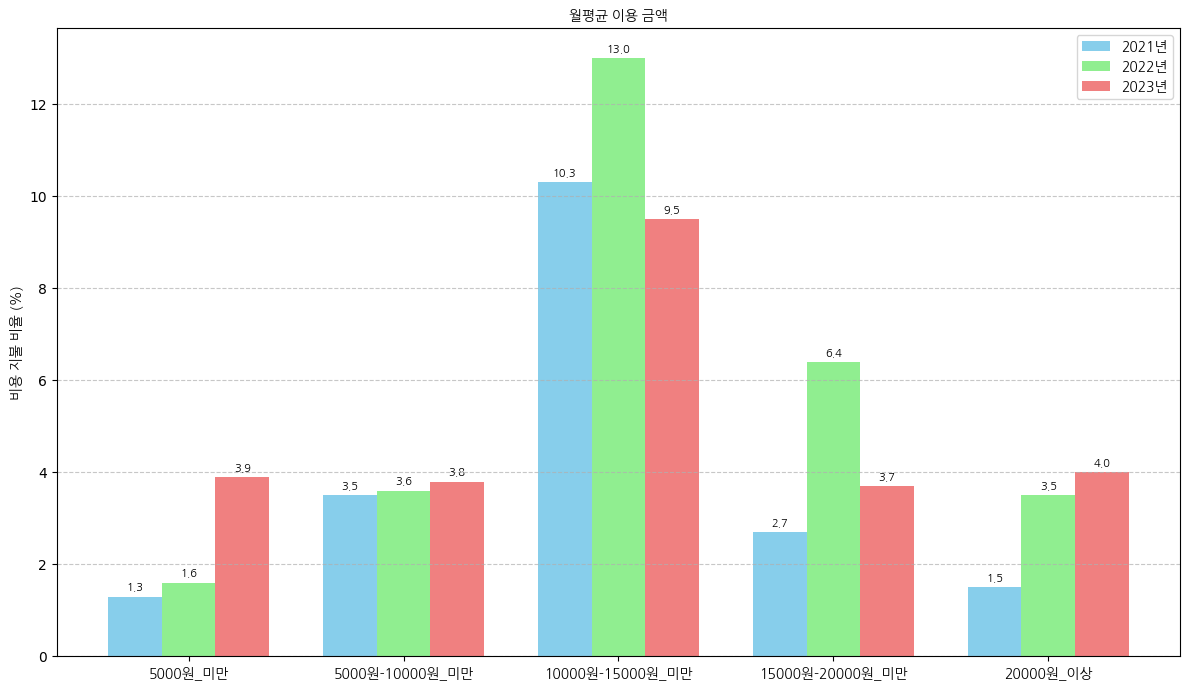

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

# 🔧 나눔고딕 폰트 경로 (실제 위치에 맞게 수정)
font_path = '/content/drive/MyDrive/Colab Notebooks/NanumGothic.ttf'  # 예시 경로
fontprop = fm.FontProperties(fname=font_path)

# 전역 폰트 설정
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 📊 데이터 준비
categories = ['5000원_미만 (%)', '5000원-10000원_미만 (%)', '10000원-15000원_미만 (%)', '15000원-20000원_미만 (%)', '20000원_이상 (%)']
years = ['2021', '2022', '2023']

sogye_row = amount_df[amount_df['구분별(2)'] == '소계'].iloc[0]

data_2021 = pd.to_numeric([sogye_row[f'2021.{i}'] for i in range(1, 6)], errors='coerce').tolist()
data_2022 = pd.to_numeric([sogye_row[f'2022.{i}'] for i in range(1, 6)], errors='coerce').tolist()
data_2023 = pd.to_numeric([sogye_row[f'2023.{i}'] for i in range(1, 6)], errors='coerce').tolist()

# 📈 그래프 그리기
x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width, data_2021, width, label='2021년', color='skyblue')
rects2 = ax.bar(x, data_2022, width, label='2022년', color='lightgreen')
rects3 = ax.bar(x + width, data_2023, width, label='2023년', color='lightcoral')  # 수정됨

ax.set_ylabel('비용 지불 비율 (%)', fontproperties=fontprop)
ax.set_title('월평균 이용 금액', fontproperties=fontprop)
ax.set_xticks(x)
ax.set_xticklabels([cat.split(' ')[0] for cat in categories], fontproperties=fontprop)
ax.legend(prop=fontprop)

# 막대 위 숫자 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if not np.isnan(height):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8,
                        fontproperties=fontprop)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
